## Group Project 03

# Flow Field Simulation Using Navier-Stokes Equations with Tensorflow

This project aims to model fluid flow around an airfoil using a neural network to solve the Navier-Stokes equations. By simulating velocity and pressure fields, the model enforces governing equations and boundary conditions through a custom loss function, capturing the behavior of incompressible, viscous fluid flow.



## Governing Equations

The Navier-Stokes equations govern the behavior of incompressible, viscous fluid flow. Here, they are defined in terms of the 2D Cartesian coordinates $ x $ and $ y $. The model captures the following aspects:

1. **Continuity Equation**: Ensures mass conservation by enforcing the condition that the divergence of velocity is zero.
   $$
   \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0
   $$
   where $ u $ and $ v $ are the velocity components in the $ x $ and $ y $ directions, respectively.

2. **X-Momentum Equation**: Describes momentum conservation in the $ x $-direction. This equation accounts for the fluid's rate of change of momentum due to forces (pressure gradients and viscous effects).
   $$
   \rho \left( \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} \right) = -\frac{\partial P}{\partial x} + \mu \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
   $$
   where $ P $ is the pressure, $ \rho $ is the fluid density, and $ \mu $ is the dynamic viscosity.

3. **Y-Momentum Equation**: Similar to the x-momentum equation, this describes momentum conservation in the $ y $-direction.
   $$
   \rho \left( \frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} \right) = -\frac{\partial P}{\partial y} + \mu \left( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \right)
   $$

These equations are implemented through neural network outputs and gradients, with boundary conditions integrated within the loss function.



## Boundary Conditions

Boundary conditions specify how the fluid interacts with the environment at the domain's edges and on the airfoil:

1. **Farfield Boundary Condition**: At farfield boundaries, the fluid velocity is set to a known maximum value. This models the effect of fluid flow at a distance.
   $$
   u = u_{\text{max}}, \quad v = 0
   $$
   where $ u_{\text{max}} $ is the maximum farfield velocity.

2. **No-Slip Condition on Airfoil**: On the airfoil surface, the fluid adheres to the airfoil (no-slip condition), meaning both velocity components are zero.
   $$
   u = 0, \quad v = 0
   $$



##  Loss Function

The custom loss function enforces the governing equations and boundary conditions by penalizing deviations:

1. **Continuity Loss**: Ensures mass conservation by minimizing the square of the divergence of velocity.
   $$
   L_{\text{continuity}} = \frac{1}{N} \sum_{i=1}^{N} \left( \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} \right)^2
   $$

2. **X-Momentum Loss**: Enforces conservation of momentum in the $ x $-direction by minimizing the difference from the x-momentum equation.
   $$
   L_{x\text{-momentum}} = \frac{1}{N} \sum_{i=1}^{N} \left( \rho \left( u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} \right) + \frac{\partial P}{\partial x} - \mu \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right) \right)^2
   $$

3. **Y-Momentum Loss**: Similarly, enforces momentum conservation in the $ y $-direction.
   $$
   L_{y\text{-momentum}} = \frac{1}{N} \sum_{i=1}^{N} \left( \rho \left( u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} \right) + \frac{\partial P}{\partial y} - \mu \left( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \right) \right)^2
   $$

4. **Boundary Condition Loss**: Enforces boundary conditions at the farfield and airfoil surface by penalizing deviations from expected values at these boundaries.
   $$
   L_{\text{boundary}} = \frac{1}{N} \sum_{i=1}^{N} \left( (u_{\text{farfield}} - u_{\text{max}})^2 + (v_{\text{farfield}})^2 \right) + \frac{1}{N} \sum_{i=1}^{N} \left( (u_{\text{airfoil}})^2 + (v_{\text{airfoil}})^2 \right)
   $$

The total loss $ L_{\text{total}} $ combines all the individual losses:
$$
L_{\text{total}} = L_{\text{continuity}} + L_{x\text{-momentum}} + L_{y\text{-momentum}} + L_{\text{boundary}}
$$



## Methodology

1. **Airfoil Geometry Generation**: 
   - The function `boundaryNACA4D` generates the geometry of a 4-digit NACA airfoil based on specified maximum camber, position, thickness, and chord length.

2. **Data Generation**:
   - **Domain Data**: Randomly sampled points across the domain simulate the continuous fluid field, capturing the entire area of interest.
   - **Boundary Data**: Specific points on the farfield boundary and airfoil surface are sampled to apply the boundary conditions effectively.

3. **Neural Network Model**: 
   - The neural network is a fully connected feedforward neural network with four hidden layers, each containing 50 neurons.
   - The network’s output consists of $ u $, $ v $, and $ P $ for each input point, representing the velocity components and pressure in the domain.

4. **Loss Function**:
   - A custom loss function is implemented to enforce the continuity, momentum conservation, and boundary conditions.
   - TensorFlow’s `GradientTape` feature computes gradients for calculating the continuity and momentum losses based on network outputs.

5. **Training Process**:
   - **Optimizer**: The Adam optimizer is used to minimize the total loss, with a learning rate of $ 1 \times 10^{-3} $.
   - **Hyperparameters**: The network structure (4 hidden layers, 50 neurons per layer) and training epochs (1000) are selected for effective approximation of the fluid flow solution.
   - **Epochs**: The model iterates through 1000 epochs, progressively minimizing the loss function by adjusting network weights.



## Training and Results

The model minimizes the custom loss function through 1000 epochs, with each epoch updating network parameters to approximate the solution to the Navier-Stokes equations for fluid flow around an airfoil. The performance of the model is monitored through the **Loss vs. Epoch Plot**, showing the convergence of the loss function.




## Tensorflow

Epoch 0, Loss: 1.9874292612075806
Epoch 100, Loss: 0.4483093321323395
Epoch 200, Loss: 0.4434766173362732
Epoch 300, Loss: 0.4376683831214905
Epoch 400, Loss: 0.4287348687648773
Epoch 500, Loss: 0.3169170618057251
Epoch 600, Loss: 0.2116834819316864
Epoch 700, Loss: 0.1828729212284088
Epoch 800, Loss: 0.15627823770046234
Epoch 900, Loss: 0.10107220709323883


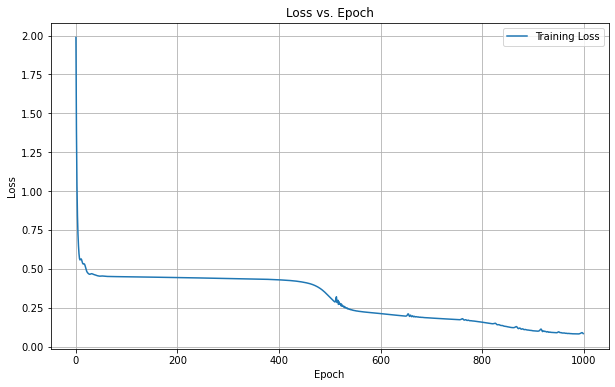

In [4]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

tf.random.set_seed(48)

xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 0.7

rho = tf.constant(1.0, dtype=tf.float32)
Re = tf.constant(10000.0, dtype=tf.float32)  # Reynolds number
mu = tf.constant(1.0 / Re, dtype=tf.float32)
umax = tf.constant(1.0, dtype=tf.float32)

def boundaryNACA4D(M, P, SS, c, n, offset_x, offset_y):
    m = M / 100
    p = P / 10
    t = SS / 100
    if m == 0:
        p = 1

    xv = np.linspace(0.0, c, n + 1)
    xv = c / 2.0 * (1.0 - np.cos(np.pi * xv / c))
    ytfcn = lambda x: 5 * t * c * (0.2969 * (x / c) ** 0.5 -
                                   0.1260 * (x / c) -
                                   0.3516 * (x / c) ** 2 +
                                   0.2843 * (x / c) ** 3 -
                                   0.1015 * (x / c) ** 4)
    yt = ytfcn(xv)
    yc = np.zeros(np.size(xv))

    for ii in range(n + 1):
        if xv[ii] <= p * c:
            yc[ii] = c * (m / p ** 2 * (xv[ii] / c) * (2 * p - (xv[ii] / c)))
        else:
            yc[ii] = c * (m / (1 - p) ** 2 * (1 + (2 * p - (xv[ii] / c)) * (xv[ii] / c) - 2 * p))

    dyc = np.zeros(np.size(xv))
    for ii in range(n + 1):
        if xv[ii] <= p * c:
            dyc[ii] = m / p ** 2 * 2 * (p - xv[ii] / c)
        else:
            dyc[ii] = m / (1 - p) ** 2 * 2 * (p - xv[ii] / c)

    th = np.arctan2(dyc, 1)
    xU = xv - yt * np.sin(th)
    yU = yc + yt * np.cos(th)
    xL = xv + yt * np.sin(th)
    yL = yc - yt * np.cos(th)

    x = np.zeros(2 * n + 1)
    y = np.zeros(2 * n + 1)
    for ii in range(n):
        x[ii] = xL[n - ii]
        y[ii] = yL[n - ii]
    x[n: 2 * n + 1] = xU
    y[n: 2 * n + 1] = yU

    return np.vstack((x + offset_x, y + offset_y)).T

def generate_domain_data(num_points):
    X_domain = np.random.rand(num_points, 2) * [xmax - xmin, ymax - ymin] + [xmin, ymin]
    return X_domain

def generate_boundary_data(num_boundary_points):
    X_boundary_farfield = generate_domain_data(num_boundary_points)
    X_boundary_airfoil = boundaryNACA4D(0, 0, 12, 0.2, 250, 0.20, 0.35)
    return X_boundary_farfield, X_boundary_airfoil

X_train = tf.convert_to_tensor(generate_domain_data(40000), dtype=tf.float32)
X_boundary_farfield = tf.convert_to_tensor(generate_domain_data(2000), dtype=tf.float32)
X_boundary_airfoil = tf.convert_to_tensor(boundaryNACA4D(0, 0, 12, 0.2, 250, 0.20, 0.35), dtype=tf.float32)

class NavierStokesModel(tf.keras.Model):
    def __init__(self):
        super(NavierStokesModel, self).__init__()
        self.hidden_layers = [tf.keras.layers.Dense(50, activation='tanh') for _ in range(4)]
        self.output_layer = tf.keras.layers.Dense(3, activation=None)

    def call(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
        return self.output_layer(x)

model = NavierStokesModel()

# loss function 
def custom_loss_with_bc(X_train, X_boundary_farfield, X_boundary_airfoil):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(X_train)
        y_pred = model(X_train)
        
        u = y_pred[:, 0:1]
        v = y_pred[:, 1:2]
        p = y_pred[:, 2:3]
        
        # First-order derivatives
        u_x = tape.gradient(u, X_train)[:, 0:1]
        u_y = tape.gradient(u, X_train)[:, 1:2]
        v_x = tape.gradient(v, X_train)[:, 0:1]
        v_y = tape.gradient(v, X_train)[:, 1:2]
        p_x = tape.gradient(p, X_train)[:, 0:1]
        p_y = tape.gradient(p, X_train)[:, 1:2]
        
        # Second-order derivatives
        u_xx = tape.gradient(u_x, X_train)[:, 0:1]
        u_yy = tape.gradient(u_y, X_train)[:, 1:2]
        v_xx = tape.gradient(v_x, X_train)[:, 0:1]
        v_yy = tape.gradient(v_y, X_train)[:, 1:2]

    del tape

    # Continuity equation
    continuity = tf.reduce_mean(tf.square(u_x + v_y))

    # X-momentum equation
    momentum_x = tf.reduce_mean(tf.square(rho * (u * u_x + v * u_y) + p_x - mu * (u_xx + u_yy)))

    # Y-momentum equation
    momentum_y = tf.reduce_mean(tf.square(rho * (u * v_x + v * v_y) + p_y - mu * (v_xx + v_yy)))

    # Boundary condition for farfield
    y_pred_farfield = model(X_boundary_farfield)
    u_far = y_pred_farfield[:, 0:1]
    v_far = y_pred_farfield[:, 1:2]
    bc_farfield = tf.reduce_mean(tf.square(u_far - umax)) + tf.reduce_mean(tf.square(v_far))

    # Boundary condition for airfoil (no-slip condition)
    y_pred_airfoil = model(X_boundary_airfoil)
    u_air = y_pred_airfoil[:, 0:1]
    v_air = y_pred_airfoil[:, 1:2]
    bc_airfoil = tf.reduce_mean(tf.square(u_air)) + tf.reduce_mean(tf.square(v_air))
    
    total_loss = continuity + momentum_x + momentum_y + bc_farfield + bc_airfoil
    return total_loss

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

loss_history = []

epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = custom_loss_with_bc(X_train, X_boundary_farfield, X_boundary_airfoil)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    loss_history.append(loss.numpy())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy()}")

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), loss_history, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend()
plt.grid()
plt.show()


225/225 [==============================] - 1s 3ms/step


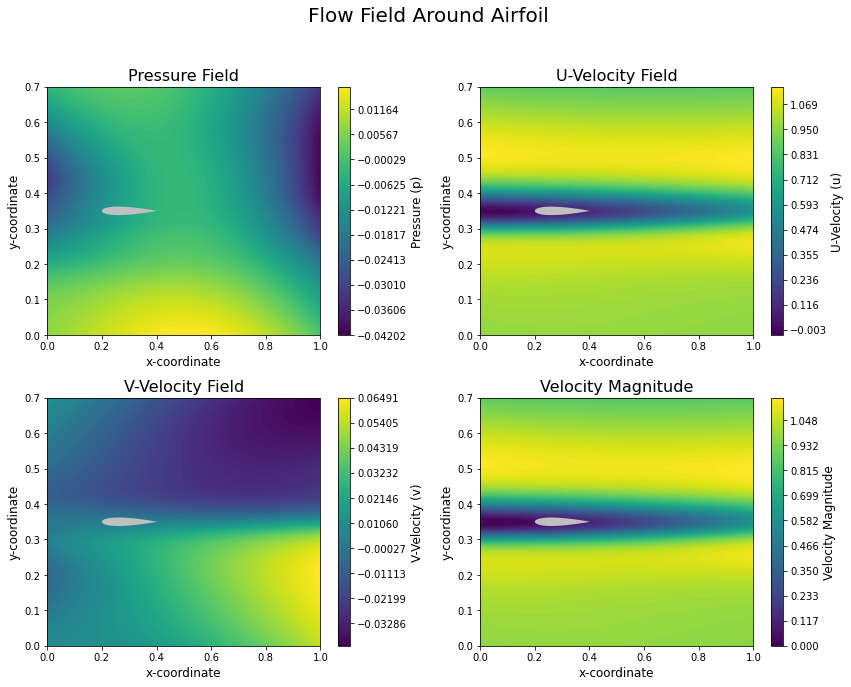

In [5]:
# Visualization of the flow field
dx = 0.01
dy = 0.01
x = np.arange(xmin, xmax + dx, dx)
y = np.arange(ymin, ymax + dy, dy)
X_plot = np.array([[xi, yi] for yi in y for xi in x])

# Model predictions
y_pred_plot = model.predict(X_plot)
u = y_pred_plot[:, 0].reshape(len(y), len(x))
v = y_pred_plot[:, 1].reshape(len(y), len(x))
p = y_pred_plot[:, 2].reshape(len(y), len(x))
velocity_magnitude = np.sqrt(u**2 + v**2)  

# Airfoil boundary plot
airfoil_plot = boundaryNACA4D(0, 0, 12, 0.2, 150, offset_x=0.20, offset_y=0.35)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Flow Field Around Airfoil", fontsize=20)

# Pressure Field
clev_p = np.linspace(p.min(), p.max(), 100)
cnt1 = axs[0, 0].contourf(x, y, p, clev_p, cmap=plt.cm.viridis)
axs[0, 0].fill(airfoil_plot[:, 0], airfoil_plot[:, 1], '#c0c0c0')
axs[0, 0].set_title("Pressure Field", fontsize=16)
axs[0, 0].set_xlabel("x-coordinate", fontsize=12)
axs[0, 0].set_ylabel("y-coordinate", fontsize=12)
axs[0, 0].set_aspect('auto')
cbar1 = fig.colorbar(cnt1, ax=axs[0, 0])
cbar1.set_label("Pressure (p)", fontsize=12)

# U-Velocity Field
clev_u = np.linspace(u.min(), u.max(), 100)
cnt2 = axs[0, 1].contourf(x, y, u, clev_u, cmap=plt.cm.viridis)
axs[0, 1].fill(airfoil_plot[:, 0], airfoil_plot[:, 1], '#c0c0c0')
axs[0, 1].set_title("U-Velocity Field", fontsize=16)
axs[0, 1].set_xlabel("x-coordinate", fontsize=12)
axs[0, 1].set_ylabel("y-coordinate", fontsize=12)
axs[0, 1].set_aspect('auto')
cbar2 = fig.colorbar(cnt2, ax=axs[0, 1])
cbar2.set_label("U-Velocity (u)", fontsize=12)

# V-Velocity Field
clev_v = np.linspace(v.min(), v.max(), 100)
cnt3 = axs[1, 0].contourf(x, y, v, clev_v, cmap=plt.cm.viridis)
axs[1, 0].fill(airfoil_plot[:, 0], airfoil_plot[:, 1], '#c0c0c0')
axs[1, 0].set_title("V-Velocity Field", fontsize=16)
axs[1, 0].set_xlabel("x-coordinate", fontsize=12)
axs[1, 0].set_ylabel("y-coordinate", fontsize=12)
axs[1, 0].set_aspect('auto')
cbar3 = fig.colorbar(cnt3, ax=axs[1, 0])
cbar3.set_label("V-Velocity (v)", fontsize=12)

# Velocity Magnitude
clev_mag = np.linspace(velocity_magnitude.min(), velocity_magnitude.max(), 100)
cnt4 = axs[1, 1].contourf(x, y, velocity_magnitude, clev_mag, cmap=plt.cm.viridis)
axs[1, 1].fill(airfoil_plot[:, 0], airfoil_plot[:, 1], '#c0c0c0')
axs[1, 1].set_title("Velocity Magnitude", fontsize=16)
axs[1, 1].set_xlabel("x-coordinate", fontsize=12)
axs[1, 1].set_ylabel("y-coordinate", fontsize=12)
axs[1, 1].set_aspect('auto')
cbar4 = fig.colorbar(cnt4, ax=axs[1, 1])
cbar4.set_label("Velocity Magnitude", fontsize=12)

# Display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

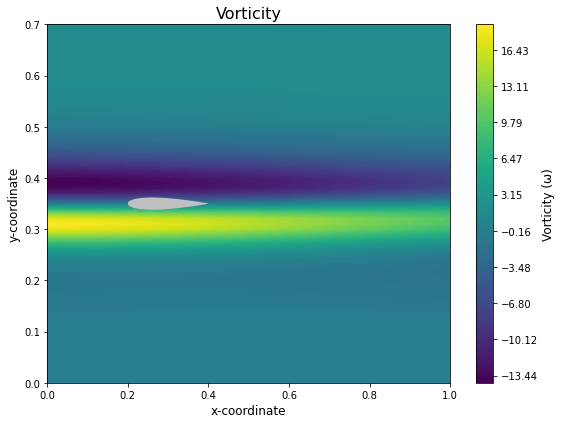

In [6]:

dv_dx = np.gradient(v, axis=1) / dx  
du_dy = np.gradient(u, axis=0) / dy  

vorticity = dv_dx - du_dy


clev_vort = np.linspace(vorticity.min(), vorticity.max(), 100)
fig, ax = plt.subplots(figsize=(8, 6))
cnt_vort = ax.contourf(x, y, vorticity, clev_vort, cmap=plt.cm.viridis)
ax.fill(airfoil_plot[:, 0], airfoil_plot[:, 1], '#c0c0c0')  # Plot the airfoil boundary
ax.set_title("Vorticity", fontsize=16)
ax.set_xlabel("x-coordinate", fontsize=12)
ax.set_ylabel("y-coordinate", fontsize=12)
ax.set_aspect('auto')
cbar_vort = fig.colorbar(cnt_vort, ax=ax)
cbar_vort.set_label("Vorticity (ω)", fontsize=12)


plt.tight_layout()
plt.show()



## Observations

1. **Loss vs. Epoch Plot**:
   - The training loss decreases significantly during the initial epochs, indicating that the model quickly learns to satisfy the governing equations and boundary conditions.
   - After around 300 epochs, the loss starts to plateau, with smaller incremental improvements as it approaches a minimum value.
   - The model converges effectively by around 800–1000 epochs, showing minimal further reduction in the loss value. This suggests that the model has learned an optimal representation of the fluid flow within the given constraints.

2. **Pressure Field**:
   - The pressure field shows a gradual change in pressure around the airfoil. 
   - Higher pressure regions appear in front of the airfoil (leading edge), where the fluid is compressed as it moves around the airfoil.
   - Lower pressure regions are observed on the upper surface of the airfoil, which is consistent with the characteristics of airflow around an airfoil, as low pressure typically forms on the upper side, creating lift.

3. **U-Velocity Field**:
   - The horizontal velocity (U-velocity) exhibits an increase in magnitude as the fluid flows over the airfoil.
   - The flow speeds up significantly on the upper surface of the airfoil, contributing to the formation of a low-pressure region.
   - Behind the airfoil, the U-velocity decreases, forming a wake with slower-moving fluid, indicating some flow separation.

4. **V-Velocity Field**:
   - The vertical velocity (V-velocity) shows asymmetry around the airfoil, which is expected as the flow is directed along the airfoil contour.
   - Higher vertical velocities are observed around the leading and trailing edges, where the airflow direction changes as it follows the airfoil’s surface.

5. **Velocity Magnitude**:
   - The velocity magnitude plot shows a clear increase in velocity as the fluid flows over the airfoil, especially on the upper surface.
   - The highest velocity region appears on the upper surface due to flow acceleration, which aligns with Bernoulli's principle, where lower pressure corresponds to higher velocity.
   - The wake region, with lower velocity, is visible behind the airfoil, showing the effect of flow separation.

6. **Vorticity Field**:
   - The vorticity plot captures regions of rotational flow, particularly around the leading and trailing edges of the airfoil.
   - Positive and negative vorticity are present along the airfoil surface, especially near the trailing edge, indicating regions of high rotational flow where fluid layers are moving in opposite directions.
   - The vorticity field helps visualize the flow rotation and separation, which is crucial for understanding the stability of the flow around the airfoil.



## Conclusions

1. **Model Performance**:
   - The neural network model successfully learned to approximate the solution to the Navier-Stokes equations with appropriate boundary conditions, achieving a smooth and stable loss curve.
   - The convergence of the loss plot indicates that the model effectively captures the behavior of incompressible, viscous flow around an airfoil.

2. **Flow Characteristics**:
   - The pressure and velocity fields exhibit typical flow patterns around an airfoil, with higher velocities and lower pressures on the upper surface, which generates lift.
   - The wake and vorticity regions indicate flow separation behind the airfoil, consistent with expected aerodynamic behavior.

3. **Vorticity Analysis**:
   - The vorticity field reveals regions of flow rotation, particularly around the trailing edge. This provides insights into potential areas of flow instability, which is essential for applications involving turbulence modeling.

4. **Applicability of the Model**:
   - This model can be extended for more complex geometries or Reynolds numbers to study different fluid dynamics scenarios.
   - The methodology provides a foundation for solving similar fluid dynamics problems using neural networks, with applications in computational fluid dynamics (CFD) for aerospace, automotive, and engineering domains.

Overall, the simulation demonstrates the capability of neural networks in approximating solutions to PDEs for fluid flow, offering a promising approach for computational simulations where traditional CFD methods are computationally intensive.
